# Modelos Scuenciales

Son modelos compuestos de pilas de capas

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Forma 

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation("relu"),
    Dense(10),
    Activation("softmax")
])

# Puedes añadir capas al modelo utilizando .add()
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))

Using TensorFlow backend.
W0815 15:17:00.348670 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 15:17:00.381667 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 15:17:00.387680 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Input shape

Especificando el tamaño de entrada

* Se es necesario especificar el tamaño de la entrada.
* Input shape: nD tensor de  forma (batch_size, input_dim) 2D input shape

    

In [ ]:
# formas equivalente de declarar input shape

# Forma 1
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
# Forma 2
model = Sequential()
model.add(Dense(32, input_dim=784))



## Compilación

Antes de entrenar un modelo, es necesario configurar el proceso de aprendizaje

* optimizer : Algoritmo optimizador de la función de perdida
* loss: Función de perdida
* metrics: metrica para problemas de clasificación, desempeño de clasificación

In [ ]:
# Para tareas de clasificación multi clase
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Para tareas de clasificación binarios
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Para tareas de regresión 
model.compile(optimizer='rmsprop',
              loss='mse')

## Entrenamiento

Problema de clasificación binaria

In [2]:
# Datos de prueba
import numpy as np
data = np.random.random((1000,100))
labels =np.random.randint(2,size=(1000,1))

In [3]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


W0815 15:17:00.595239 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 15:17:00.638162 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0815 15:17:00.655933 19912 deprecation.py:323] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.fit(data, labels, epochs=10, batch_size=32)

W0815 15:17:03.305871 19912 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.7081 - acc: 0.4940
Epoch 2/10
1000/1000 [==============================] - 0s 375us/step - loss: 0.6929 - acc: 0.5320
Epoch 3/10
1000/1000 [==============================] - 0s 370us/step - loss: 0.6954 - acc: 0.5250
Epoch 4/10
1000/1000 [==============================] - 0s 377us/step - loss: 0.6899 - acc: 0.5360
Epoch 5/10
1000/1000 [==============================] - 0s 372us/step - loss: 0.6872 - acc: 0.5430
Epoch 6/10
1000/1000 [==============================] - 0s 385us/step - loss: 0.6840 - acc: 0.5410
Epoch 7/10
1000/1000 [==============================] - 0s 369us/step - loss: 0.6822 - acc: 0.5520
Epoch 8/10
1000/1000 [==============================] - 0s 371us/step - loss: 0.6757 - acc: 0.5820
Epoch 9/10
1000/1000 [==============================] - 0s 380us/step - loss: 0.6717 - acc: 0.5820
Epoch 10/10
1000/1000 [==============================] - 0s 368us/step - loss: 0.6699 - acc: 0.5920


Problema de clasificación multi clase

In [5]:
# GDatos de prueba
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

In [6]:
# Convertir labels a representación one-hot encoding
from keras.utils import to_categorical
one_hot_labels = to_categorical(labels, num_classes=10)

In [7]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 1s 890us/step - loss: 2.3478 - acc: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 198us/step - loss: 2.3167 - acc: 0.1010
Epoch 3/10
1000/1000 [==============================] - 0s 179us/step - loss: 2.3055 - acc: 0.1160
Epoch 4/10
1000/1000 [==============================] - 0s 253us/step - loss: 2.3001 - acc: 0.1260
Epoch 5/10
1000/1000 [==============================] - 0s 256us/step - loss: 2.2901 - acc: 0.1320
Epoch 6/10
1000/1000 [==============================] - 0s 249us/step - loss: 2.2820 - acc: 0.1310
Epoch 7/10
1000/1000 [==============================] - 0s 243us/step - loss: 2.2741 - acc: 0.1380
Epoch 8/10
1000/1000 [==============================] - 0s 245us/step - loss: 2.2667 - acc: 0.1530
Epoch 9/10
1000/1000 [==============================] - 0s 247us/step - loss: 2.2579 - acc: 0.1480
Epoch 10/10
1000/1000 [==============================] - 0s 257us/step - loss: 2.2501 - acc: 0.1700


## Ejemplo

In [9]:
# Multilayer Perceptron (MLP) for multi-class softmax classification:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Especificar input_shape (número de covariables)
model.add(Dense(64, activation="relu", input_dim=20))
model.add(Dropout(.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Optimizador
# decay reduce learning rate en cada epoca
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# evaluate: regresa el loss value y el valor de la métrica seleccionada
score = model.evaluate(x_test, y_test, batch_size=128)



W0815 15:22:34.876842 19912 deprecation.py:506] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3453 - acc: 0.0980
Epoch 2/20
1000/1000 [==============================] - 0s 78us/step - loss: 2.3357 - acc: 0.1110
Epoch 3/20
1000/1000 [==============================] - 0s 78us/step - loss: 2.3233 - acc: 0.0990
Epoch 4/20
1000/1000 [==============================] - 0s 79us/step - loss: 2.3207 - acc: 0.1120
Epoch 5/20
1000/1000 [==============================] - 0s 81us/step - loss: 2.3068 - acc: 0.1270
Epoch 6/20
1000/1000 [==============================] - 0s 77us/step - loss: 2.3050 - acc: 0.1240
Epoch 7/20
1000/1000 [==============================] - 0s 77us/step - loss: 2.3045 - acc: 0.1030
Epoch 8/20
1000/1000 [==============================] - 0s 80us/step - loss: 2.2954 - acc: 0.1250
Epoch 9/20
1000/1000 [==============================] - 0s 79us/step - loss: 2.3005 - acc: 0.1200
Epoch 10/20
1000/1000 [==============================] - 0s 71us/step - loss: 2.2922 - acc: 0.1370
Epoch 11/20
1000/100

In [11]:
print(score)

[2.3023195266723633, 0.05999999865889549]


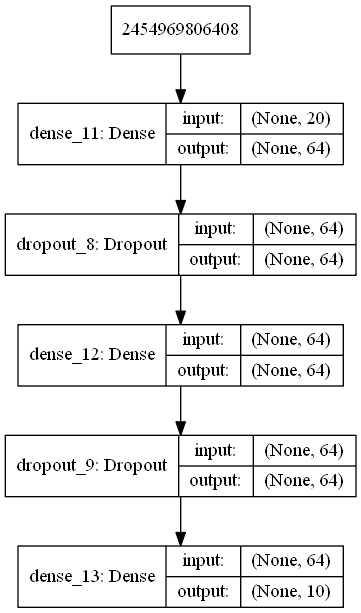

In [22]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model.png')

In [ ]:
# clasificación binaria
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Datos
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
# VGG-like convnet:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Datos
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

# input: 100x100 imagenes con 3 chancnalesnels -> (100, 100, 3) tensors.

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

In [ ]:
# Modelo secuencial con LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM

max_feature = 1024
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

In [ ]:
# Convolución 1D  texto
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 64

# input_shape(batches, timesteps, features)

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D()) # no necesita flatten
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

# visualización
# Visualización 
from keras.utils import plot_model
plot_model(model_sequential, to_file='model.png',show_shapes=True, show_layer_names=True)